In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



In [90]:
train = pd.read_csv('../data/train.csv',na_values=" ?")
test = pd.read_csv('../data/test.csv',na_values=" ?")


In [92]:
test.isna().sum()

no                   0
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64

In [91]:
train.isna().sum()

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [52]:
print(train.shape)
print(test.shape)


(29305, 16)
(19537, 15)


In [53]:
train.isna().sum()

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [54]:

test.isna().sum()

no                   0
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64

In [55]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [56]:
train['capital-margin'] = train['capital-gain'] - train['capital-loss']
train['capital-total'] = train['capital-gain'] + train['capital-loss']
train['capital-margin-flag'] = np.nan

In [57]:
test['capital-margin'] = test['capital-gain'] - test['capital-loss']
test['capital-total'] = test['capital-gain'] + test['capital-loss']
test['capital-margin-flag'] = np.nan

In [58]:
train.loc[train['capital-margin']==0, 'capital-margin-flag'] = 'zero'
train.loc[train['capital-margin']>0, 'capital-margin-flag'] = 'positive'
train.loc[train['capital-margin']<0, 'capital-margin-flag'] = 'negative'

In [59]:
test.loc[test['capital-margin']==0, 'capital-margin-flag'] = 'zero'
test.loc[test['capital-margin']>0, 'capital-margin-flag'] = 'positive'
test.loc[test['capital-margin']<0, 'capital-margin-flag'] = 'negative'

In [60]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-margin,capital-total,capital-margin-flag
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,0,0,zero
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,-1721,1721,negative
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,0,0,zero
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,0,0,zero
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,0,0,zero


In [61]:
test['income'] = 0

In [62]:
data = pd.concat([train,test],axis=0)

In [86]:
data.shape

(48842, 20)

In [89]:
data.isna().sum()

age                               0
workclass                      2799
education                         0
education-num                     0
marital-status                    0
occupation                     2809
relationship                      0
race                              0
sex                               0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
native-country                  857
income                            0
capital-margin                    0
capital-total                     0
capital-margin-flag               0
workclass-occupation           2809
race-sex                          0
marital-status-relationship       0
dtype: int64

### workclass-occupation

In [87]:
data['workclass'].fillna("temp")

0                  Private
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
19532     Self-emp-not-inc
19533              Private
19534              Private
19535              Private
19536              Private
Name: workclass, Length: 48842, dtype: object

In [79]:
data['workclass-occupation'] = data['workclass'] +data['occupation']

In [80]:
data['workclass-occupation']

0             Private Machine-op-inspct
1                 Private Other-service
2             Private Handlers-cleaners
3                  Private Tech-support
4              Private Transport-moving
                      ...              
19532     Self-emp-not-inc Craft-repair
19533           Private Exec-managerial
19534            Private Prof-specialty
19535                     Private Sales
19536              Private Tech-support
Name: workclass-occupation, Length: 48842, dtype: object

race-sex

In [81]:
data['race-sex'] = data['race'] + data['sex']

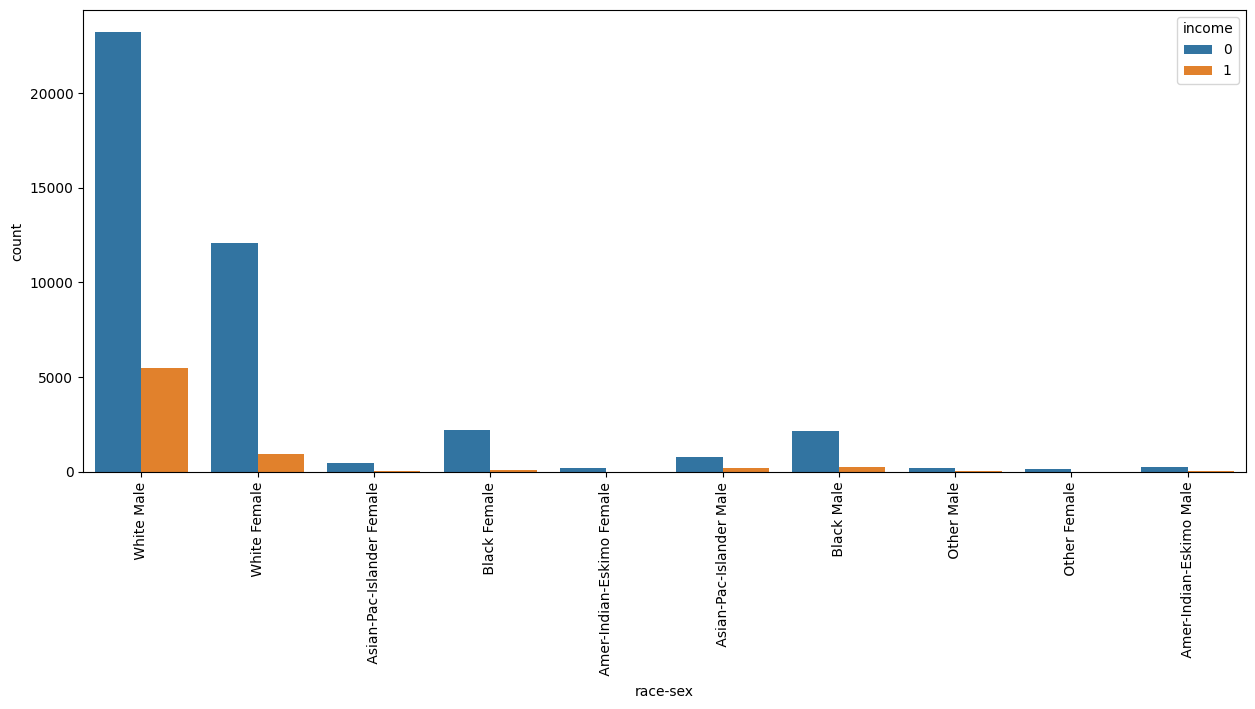

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(data, x='race-sex', hue='income')
plt.xticks(rotation=90)
plt.show()

### marital-status + relationship	


In [69]:
data['marital-status-relationship'] = data['marital-status']+data['relationship']

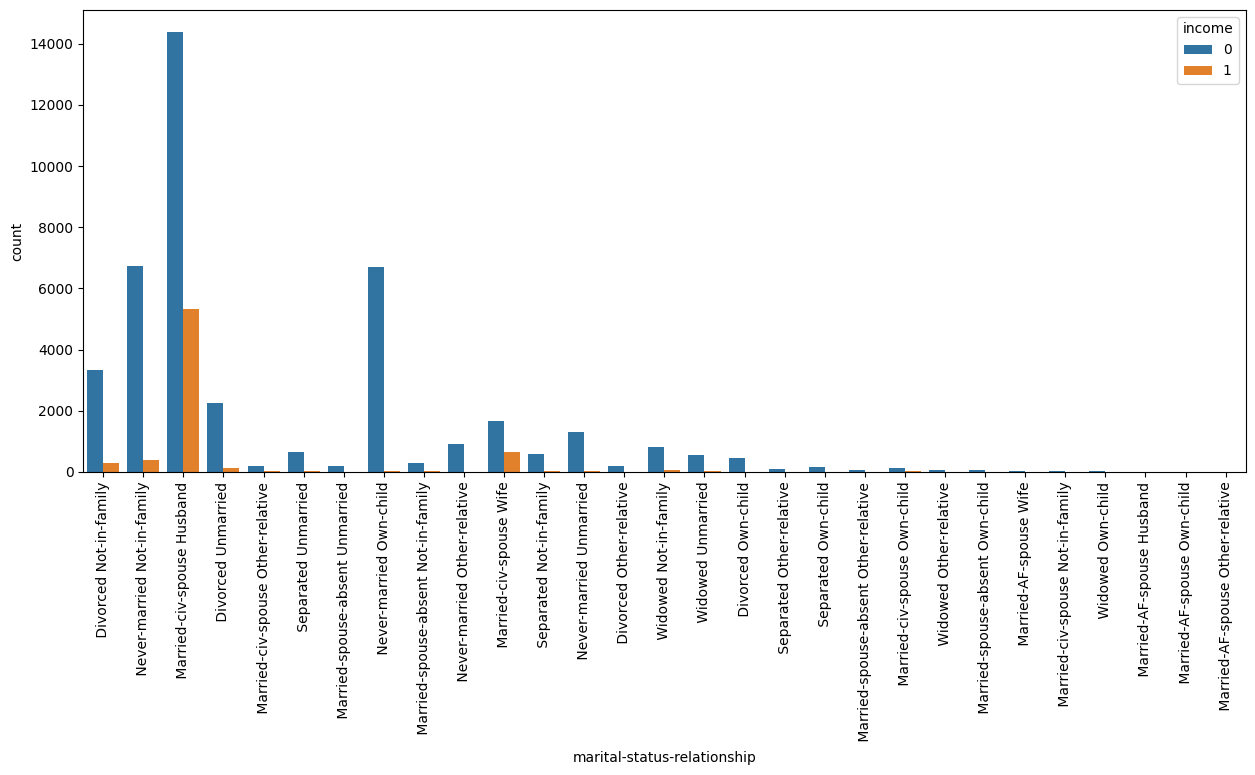

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(data, x='marital-status-relationship', hue='income')
plt.xticks(rotation=90)
plt.show()

### fnlwgt

In [71]:
data.drop('fnlwgt', axis=1, inplace=True)

### no

In [72]:
data.drop('no', axis=1, inplace=True)

In [84]:
data.isna().sum()

age                               0
workclass                      2799
education                         0
education-num                     0
marital-status                    0
occupation                     2809
relationship                      0
race                              0
sex                               0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
native-country                  857
income                            0
capital-margin                    0
capital-total                     0
capital-margin-flag               0
workclass-occupation           2809
race-sex                          0
marital-status-relationship       0
dtype: int64

In [74]:
data['native-country'].fillna(" United-States ")

0         United-States
1         United-States
2                 Haiti
3         United-States
4         United-States
              ...      
19532     United-States
19533     United-States
19534     United-States
19535     United-States
19536     United-States
Name: native-country, Length: 48842, dtype: object

In [75]:
data['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 